# Sharpe Ratio
- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

### Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

### Need to understand
- Portfolio return (done in part 1)
- Risk free return
- Standard deviation of portfolio (or the risk)

### Resources
- **Risk free return** 10 Year Treasury Note https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield
- Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp
- Standard deviation https://www.investopedia.com/terms/s/standarddeviation.asp

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [3]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2020-01-02  74.333511  158.571075  32.299999  126.975204  75.087502   
2020-01-03  73.610840  156.596588  31.520000  125.962540  74.357498   
2020-01-06  74.197395  157.001373  31.639999  125.737526  74.949997   
2020-01-07  73.848442  155.569855  32.540001  125.821907  74.597504   
2020-01-08  75.036385  158.047836  33.049999  126.872055  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  32.299999  135.419998  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  134.339996  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  134.100006  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  134.190002  75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  135.309998  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2020-01-02  31.959999  134.770004  74.059998  158.779999  32.310001   
2020-01-03  31.260000  133.559998  74.287498  158.320007  31.709999   
2020-01-06  31.160000  133.199997  73.447502  157.080002  31.230000   
2020-01-07  31.719999  133.399994  74.959999  159.320007  31.799999   
2020-01-08  32.349998  133.919998  74.290001  158.929993  32.349998   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2020-01-02  135.000000  135480400.0  22622100.0  10721100.0  3148600.0  
2020-01-03  133.570007  146322800.0  21116200.0  14429500.0  2373700.0  
2020-01-06  133.419998  118387200.0  20813700.0  12582500.0  2425500.0  
2020-01-07  133.690002  108872000.0  21634100.0  13712900.0  3090800.0  
2020-01-08  134.509995  132079200.0  27746500.0  14632400.0  4346000.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,74.333511,158.571075,32.299999,126.975204
2020-01-03,73.610840,156.596588,31.520000,125.962540
2020-01-06,74.197395,157.001373,31.639999,125.737526
2020-01-07,73.848442,155.569855,32.540001,125.821907
2020-01-08,75.036385,158.047836,33.049999,126.872055
...,...,...,...,...
2021-02-18,129.710007,243.789993,72.260002,120.730003
2021-02-19,129.869995,240.970001,72.279999,118.989998
2021-02-22,126.000000,234.509995,70.489998,120.860001


In [6]:
portfolio = [.25, .15, .40, .20]

In [7]:
np.sum(portfolio)

1.0

In [12]:
np.sum(np.log(data/data.shift())*portfolio, axis=1)

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2021-02-18    0.001453
2021-02-19   -0.004230
2021-02-22   -0.018551
2021-02-23    0.013604
2021-02-24   -0.002987
Length: 289, dtype: float64

In [13]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [14]:
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2021-02-18    0.001453
2021-02-19   -0.004230
2021-02-22   -0.018551
2021-02-23    0.013604
2021-02-24   -0.002987
Length: 289, dtype: float64

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


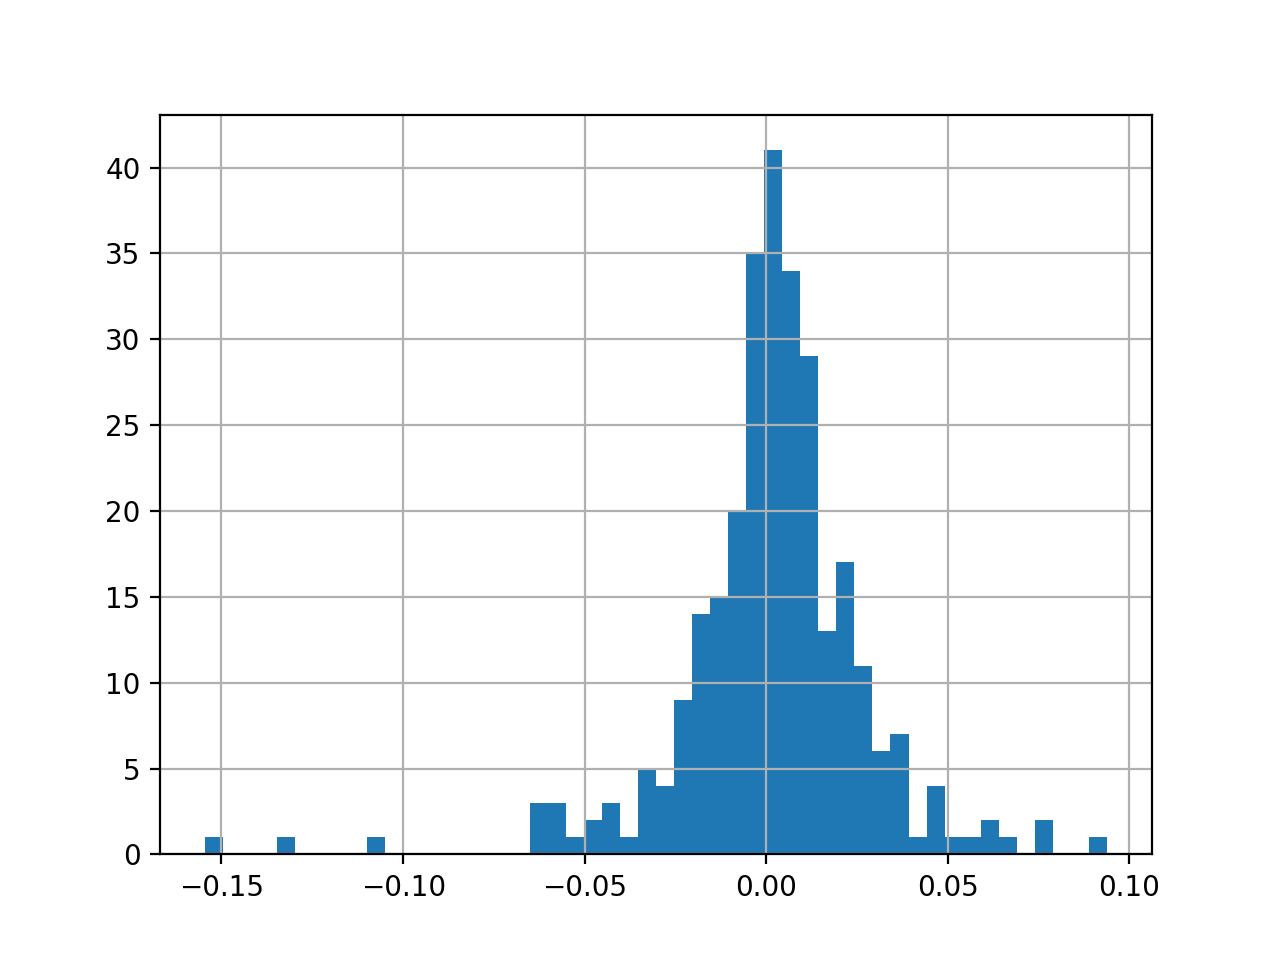

<AxesSubplot:>

In [16]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [17]:
log_return.std()

0.026396173283471748

In [18]:
log_return.mean()

0.0017423232017227859

In [19]:
sharpe_ratio = log_return.mean()/log_return.std()

In [20]:
sharpe_ratio

0.06600665873086083

In [28]:
asr = sharpe_ratio*252**.5

In [29]:
asr

1.0478232232570082

In [23]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.08484652, 0.40189555, 0.35319827, 0.16005966])

In [24]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [25]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [30]:
asr2 = sharpe_ratio2*252**.5

In [31]:
asr2

1.0125570217525268